<a href="https://colab.research.google.com/github/minhazuddin/cnn/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

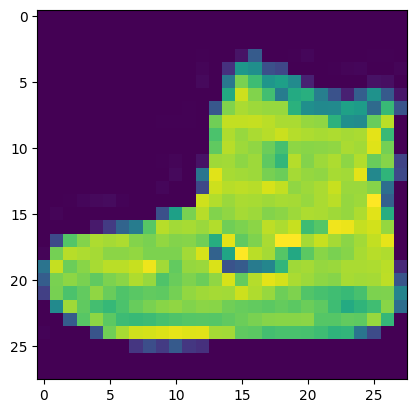

In [5]:
plt.imshow(X_train[0])

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train.max()

1.0

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [10]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [11]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10, activation='softmax')])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [14]:
model.compile(optimizer='adam', loss=['categorical_crossentropy'], metrics=['accuracy'])

In [15]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.4074 - accuracy: 0.8552 - val_loss: 0.3528 - val_accuracy: 0.8705
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2786 - accuracy: 0.8982 - val_loss: 0.3081 - val_accuracy: 0.8897
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2340 - accuracy: 0.9137 - val_loss: 0.2719 - val_accuracy: 0.8993
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2001 - accuracy: 0.9256 - val_loss: 0.2860 - val_accuracy: 0.8970
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1726 - accuracy: 0.9351 - val_loss: 0.2660 - val_accuracy: 0.9085
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1496 - accuracy: 0.9439 - val_loss: 0.2660 - val_accuracy: 0.9109
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1283 - accuracy: 0.9518 - val_loss: 0.2818 -

In [16]:
losses = pd.DataFrame(model.history.history)

In [17]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.407426,0.855217,0.352780,0.8705
1,0.278582,0.898250,0.308051,0.8897
2,0.233964,0.913750,0.271932,0.8993
3,0.200146,0.925583,0.285993,0.8970
4,0.172648,0.935067,0.266020,0.9085
5,0.149646,0.943867,0.265951,0.9109
6,0.128282,0.951833,0.281841,0.9125
7,0.111199,0.958500,0.283292,0.9118


In [19]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2833 - accuracy: 0.9118


[0.28329217433929443, 0.9118000268936157]

In [34]:
new_number = X_test[0]

In [39]:
model.predict(new_number.reshape(1,28,28,1)).argmax()

1/1 [==============================] - 0s 25ms/step


9

In [40]:
y_test[0]

9